# NLP Coursework Data Analysis

## Setup

## Imports

In [53]:
import nltk

nltk.download("stopwords")
nltk.download("punkt")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import pandas as pd
import numpy as np


from tqdm import tqdm
from pprint import pprint
from operator import itemgetter
from matplotlib import pyplot as plot

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Load Dataset

In [85]:
fields = ["idx", "id", "category", "language", "text", "score"]

with open("data/dontpatronizeme_pcl.tsv", "r") as f:
    df = pd.read_csv(f, delimiter="\t", names=fields, header=None)

df.dropna(inplace=True)

patr_df = df.loc[df["score"] >= 2]
unpatr_df = df.loc[df["score"] <= 1]

patr_df_length = patr_df.shape[0]
unpatr_df_length = unpatr_df.shape[0]

print(patr_df.shape, unpatr_df.shape)

(993, 6) (9475, 6)


## Data Analysis

### General Info

#### Balance of Classes

Text(0.5, 0, 'Score')

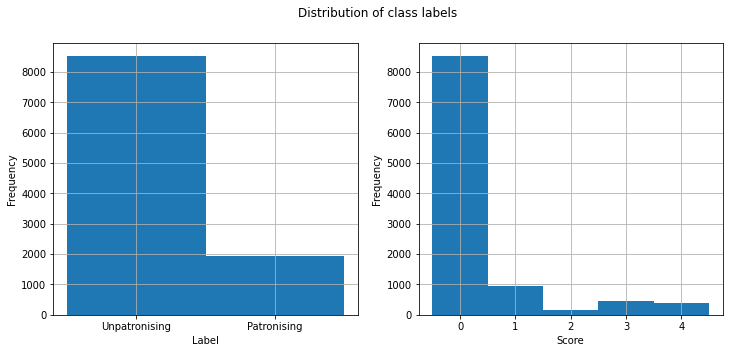

In [144]:
figure, (binary_ax, multi_ax) = plot.subplots(1, 2)

figure.suptitle("Distribution of class labels")
figure.set_size_inches((12, 5))

df["score"].map(lambda x: "Patronising" if x > 0 else "Unpatronising") \
    .hist(ax=binary_ax, bins=[-0.5, 0.5, 1.5]) 

binary_ax.set_ylabel("Frequency")
binary_ax.set_xlabel("Label")

df["score"].hist(ax=multi_ax, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]) 

multi_ax.set_ylabel("Frequency")
multi_ax.set_xlabel("Score")

#### Distribution of Languages

Text(0.5, 0, 'Language')

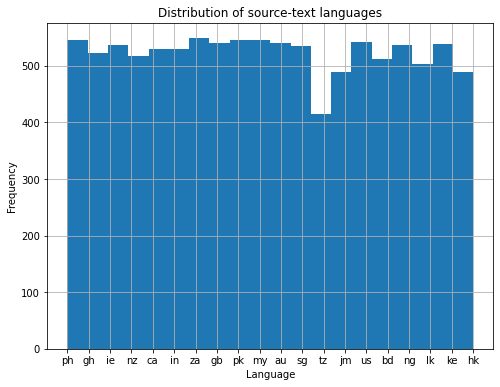

In [87]:
df["language"].hist(bins=20, figsize=(8, 6))

plot.title("Distribution of source-text languages")
plot.ylabel("Frequency")
plot.xlabel("Language")

## Text Analysis

#### Average Character Length

Mean number of characters for
	- patronising dataset: 287.06
	- unpatronising dataset: 264.38


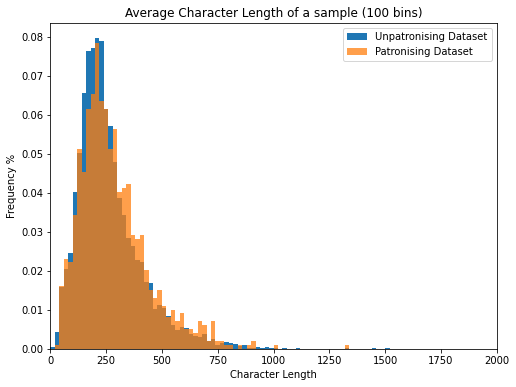

In [101]:
unpatr_series = unpatr_df["text"].str.len()
patr_series = patr_df["text"].str.len()

print(f"Mean number of characters for"
      f"\n\t- patronising dataset: {patr_series.mean():.2f}"
      f"\n\t- unpatronising dataset: {unpatr_series.mean():.2f}")

(unpatr_counts, unpatr_bins) = np.histogram(unpatr_series, bins=100, range=(0, 2000))
(patr_counts, patr_bins) = np.histogram(patr_series, bins=100, range=(0, 2000))

figure, axis = plot.subplots()
figure.set_size_inches((8, 6))

axis.hist(unpatr_bins[:-1], unpatr_bins, alpha=1, label="Unpatronising Dataset",
          weights=unpatr_counts / unpatr_df_length)

axis.hist(patr_bins[:-1], patr_bins, alpha=0.75, label="Patronising Dataset",
          weights=patr_counts / patr_df_length)

axis.set_title("Average Character Length of a sample (100 bins)")
axis.set_ylabel("Frequency %")
axis.set_xlabel("Character Length")
axis.set_xlim((0, 2000))
axis.legend()

#### Average Number of Words

Mean number of words for
	- patronising dataset: 53.62
	- unpatronising dataset: 47.88


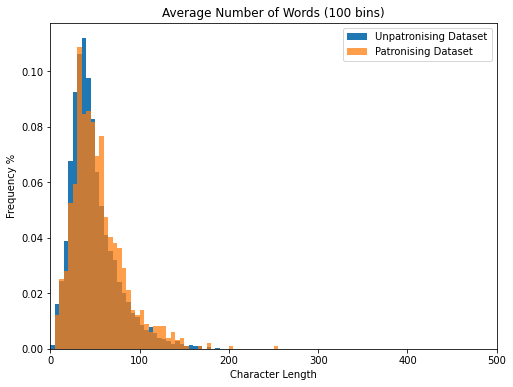

In [100]:
def get_list_length(x):
    if type(x) != list:
        x = [str(x)]

    return len(x)

unpatr_series = unpatr_df["text"].str.split().map(get_list_length)
patr_series = patr_df["text"].str.split().map(get_list_length)

print(f"Mean number of words for"
      f"\n\t- patronising dataset: {patr_series.mean():.2f}"
      f"\n\t- unpatronising dataset: {unpatr_series.mean():.2f}")

(unpatr_counts, unpatr_bins) = np.histogram(unpatr_series, bins=100, range=(0, 500))
(patr_counts, patr_bins) = np.histogram(patr_series, bins=100, range=(0, 500))

figure, axis = plot.subplots()
figure.set_size_inches((8, 6))

axis.hist(unpatr_bins[:-1], unpatr_bins, alpha=1, label="Unpatronising Dataset",
          weights=unpatr_counts / unpatr_df_length)

axis.hist(patr_bins[:-1], patr_bins, alpha=0.75, label="Patronising Dataset",
          weights=patr_counts / patr_df_length)

axis.set_title("Average Number of Words (100 bins)")
axis.set_ylabel("Frequency %")
axis.set_xlabel("Character Length")
axis.set_xlim((0, 500))
axis.legend()

#### Average Word Length

Mean number of words for
	- patronising dataset: 4.40
	- unpatronising dataset: 4.60


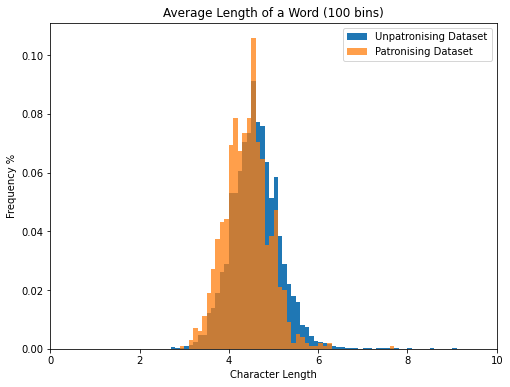

In [99]:
def mean_item_length(x):
    if type(x) != list:
        x = [str(x)]
    
    lengths = list(map(len, x))
    return np.mean(lengths)

unpatr_series = unpatr_df["text"].str.split().map(mean_item_length)
patr_series = patr_df["text"].str.split().map(mean_item_length)

print(f"Average word length for"
      f"\n\t- patronising dataset: {patr_series.mean():.2f}"
      f"\n\t- unpatronising dataset: {unpatr_series.mean():.2f}")

(unpatr_counts, unpatr_bins) = np.histogram(unpatr_series, bins=100, range=(0, 10))
(patr_counts, patr_bins) = np.histogram(patr_series, bins=100, range=(0, 10))

figure, axis = plot.subplots()
figure.set_size_inches((8, 6))

axis.hist(unpatr_bins[:-1], unpatr_bins, alpha=1, label="Unpatronising Dataset",
          weights=unpatr_counts / unpatr_df_length)

axis.hist(patr_bins[:-1], patr_bins, alpha=0.75, label="Patronising Dataset",
          weights=patr_counts / patr_df_length)

axis.set_title("Average Length of a Word (100 bins)")
axis.set_ylabel("Frequency %")
axis.set_xlabel("Character Length")
axis.set_xlim((0, 10))
axis.legend()

### $ n $-gram Analysis

In [136]:
import nltk
import re
import string
import json

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer

punct_regex = re.compile(r'[\s\,\/\.\']')
lemmatizer = WordNetLemmatizer()

def remove_stop_words(token):
    return token not in stopwords.words("english")

def remove_punctuation(token):
    return not any(map(lambda s: s in string.punctuation, token))

def lemmatize(word):
    return lemmatizer.lemmatize(word, pos="v")

def get_tokenized_corpus(corpus):
    tokenized_with_punct_and_stops = list()
    tokenized_corpus = list()

    for sentence in tqdm(corpus, unit="sentence"):
        tokens = wordpunct_tokenize(sentence)
        tokens = list(map(lemmatize, tokens))

        tokenized_with_punct_and_stops.append(tokens)

        tokens = filter(remove_punctuation, tokens)
        tokens = filter(remove_stop_words, tokens)

        tokenized_corpus.append(list(tokens))
        
    return {
        "no_punct_or_stops": tokenized_corpus, 
        "lemmatized_only": tokenized_with_punct_and_stops
    }

patr_corpus = get_tokenized_corpus(patr_df["text"])
unpatr_corpus = get_tokenized_corpus(unpatr_df["text"])

complete_corpus = {
    "no_punct_or_stops": patr_corpus["no_punct_or_stops"] \
        + unpatr_corpus["no_punct_or_stops"], 
    "lemmatized_only": patr_corpus["lemmatized_only"] \
        + unpatr_corpus["lemmatized_only"]
}

with open("corpus/tokenised_corpus.json", "w") as f:
    json.dump(complete_corpus, f, indent=4)

with open("corpus/patronising_tokenised_corpus.json", "w") as f:
    json.dump(patr_corpus, f, indent=4)

with open("corpus/unpatronising_tokenised_corpus.json", "w") as f:
    json.dump(unpatr_corpus, f, indent=4)

patr_corpus = patr_corpus.get("no_punct_or_stops")
unpatr_corpus = unpatr_corpus.get("no_punct_or_stops")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 9475/9475 [00:21<00:00, 439.34sentence/s]


In [137]:
pprint(patr_corpus)

[['Arshad',
  'say',
  'besides',
  'learn',
  'many',
  'new',
  'aspects',
  'sport',
  'leadership',
  'learn',
  'fast',
  'develop',
  'nations',
  'use',
  'sport',
  'tool',
  'development',
  'effort',
  'disable',
  'underprivileged',
  'leave',
  'behind',
  'stage'],
 ['Fast',
  'food',
  'employee',
  'feed',
  'disable',
  'man',
  'become',
  'internet',
  'sensation'],
 ['Vanessa',
  'feel',
  'hopelessness',
  'final',
  'days',
  'increase',
  'cry',
  'help',
  'yield',
  'response',
  'resident',
  'magistrate',
  'place',
  'care',
  'State',
  'Her',
  'letter',
  'convey',
  'court',
  'official',
  'investigator',
  'Office',
  'Children',
  'Advocate'],
 ['In',
  'September',
  'Major',
  'Nottle',
  'set',
  'foot',
  'Melbourne',
  'Canberra',
  'plead',
  'national',
  'solution',
  'homeless',
  'problem'],
 ['The',
  'demographics',
  'Pakistan',
  'India',
  'similar',
  'Poverty',
  'widespread',
  'issue',
  'According',
  'FAO',
  '40',
  'percent',
  '

In [138]:
def get_n_gram_frequency(n, sentences):
    n_grams = dict()

    for i, sentence in enumerate(sentences):
        
        for j in range(len(sentence) + 1 - n):
            n_gram = " ".join(sentence[j:j+n]).lower()

            if n_gram in n_grams:
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1

            """
            if n_gram in n_grams:
                n_grams[n_gram]["count"] += 1
                n_grams[n_gram]["refs"].append((i, j))
            else:
                n_grams[n_gram] = {
                    "count": 1,
                    "refs": [(i, j)]
                }
            """
    
    return n_grams

def to_tuple(dictionary):
    return list(zip(dictionary.keys(), dictionary.values()))
    """
    keys = dictionary.keys()

    counts = map(itemgetter("count"), dictionary.values())
    refs = map(itemgetter("refs"), dictionary.values())
    
    return list(zip(keys, counts, refs))
    """

def find_matching_n_grams(corpus_a, corpus_b, n, k=50):
    a_n_grams = get_n_gram_frequency(n, corpus_a)
    b_n_grams = get_n_gram_frequency(n, corpus_b)

    common_a_n_grams = sorted(to_tuple(a_n_grams), 
                              key=itemgetter(1),
                              reverse=True)[:k]

    common_b_n_grams = sorted(to_tuple(b_n_grams), 
                              key=itemgetter(1),
                              reverse=True)[:k]

    common_a_strings = set(map(itemgetter(0), common_a_n_grams))
    common_b_strings = set(map(itemgetter(0), common_b_n_grams))

    common_n_grams = set.intersection(common_a_strings, common_b_strings)
    common_a_not_b = common_a_strings.difference(common_b_strings)
    common_b_not_a = common_b_strings.difference(common_a_strings)

    def common_n_gram_counts(n_gram):
        return (n_gram, a_n_grams.get(n_gram, 0), b_n_grams.get(n_gram, 0))

    common_n_grams = list(map(common_n_gram_counts, common_n_grams))
    common_a_not_b = list(map(common_n_gram_counts, common_a_not_b))
    common_b_not_a = list(map(common_n_gram_counts, common_b_not_a))

    return common_n_grams, common_a_not_b, common_b_not_a

In [140]:
n_gram_analysis = dict()

for n in range(1, 8):
    common_n_grams, common_a_not_b, \
    common_b_not_a = find_matching_n_grams(patr_corpus, unpatr_corpus, n)

    n_gram_analysis[n] = {
        "common_n_grams": common_n_grams,
        "common_a_not_b": common_a_not_b,
        "common_b_not_a": common_b_not_a
    }

    print(f"Common {n}-grams between patronising and non-patronising datasets")
    print(common_n_grams)

    print(f"Common {n}-grams in the patronising dataset but not in the non-patronising dataset.")
    print(common_a_not_b)

    print(f"Common {n}-grams in the non-patronising dataset but not in the patronising dataset.")
    print(common_b_not_a)

"""
with open("results/n_gram_analysis", "w") as f:
    json.dump(n_gram_analysis, f, indent=4)
"""

Common 1-grams between patronising and non-patronising datasets
[('make', 105, 836), ('the', 244, 2850), ('poor', 234, 956), ('women', 146, 1572), ('he', 66, 503), ('time', 67, 570), ('support', 64, 463), ('get', 88, 490), ('i', 222, 1251), ('refugees', 95, 871), ('homeless', 177, 858), ('people', 260, 1604), ('work', 98, 690), ('in', 65, 653), ('hopeless', 79, 456), ('take', 69, 625), ('say', 244, 2540), ('government', 79, 773), ('new', 62, 746), ('country', 86, 665), ('disable', 104, 1034), ('it', 88, 676), ('families', 212, 1129), ('live', 161, 594), ('children', 199, 840), ('go', 69, 550), ('help', 192, 551), ('many', 92, 697), ('also', 80, 905), ('come', 90, 546), ('home', 80, 464), ('vulnerable', 97, 1107), ('need', 275, 1419), ('would', 90, 728), ('us', 79, 548), ('one', 79, 874), ('n', 89, 635)]
Common 1-grams in the patronising dataset but not in the non-patronising dataset.
[('this', 66, 390), ('hope', 65, 106), ('life', 99, 253), ('see', 68, 343), ('care', 60, 253), ('even',

'\nwith open("results/n_gram_analysis", "w") as f:\n    json.dump(n_gram_analysis, f, indent=4)\n'

In [ ]:
text_to_translate = "\n".join(df["text"])

with open("data/dontpatronizeme_to_translate.txt", "w") as f:
    f.write(text_to_translate)
